___
### 🚧 Warning 🚧
None of this code is adjusted to the new data format, it will probably not work.
___

# Noising

Check out issue [#4](https://github.com/Project-THI/Hough-Transformations/issues/4) on the repository. 

<details><summary>Packages</summary>

`ipynb` is required to import functions from another Jupyter notebook, see [here](https://stackoverflow.com/questions/44116194/import-a-function-from-another-ipynb-file). 

```bash
pip install ipynb
```

</details>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

from ipynb.fs.full.functions import visualize, plot_noise, prepare_voxel # type: ignore

In [2]:
path = '/home/matthias/Github/Hough-Transformations/data/norm/qspace_nr01.pt'

In [3]:
# open tensor from path
data = torch.load(path)

In [4]:
# shape
print(data[207].shape)

torch.Size([33, 33, 33])


In [5]:
# get datapoint 207
#datapoint = data[207]
datapoint = data[361]
rnd = 361

# rnd = np.random.randint(0, len(data))
# datapoint = data[rnd]
datapoint.shape

# norm and real, if not already applied
# datapoint = prepare_voxel(datapoint)

torch.Size([33, 33, 33])

In [6]:
# intensity value range, can be from 0 to 1
int_range = [0.5, 1]

## Data

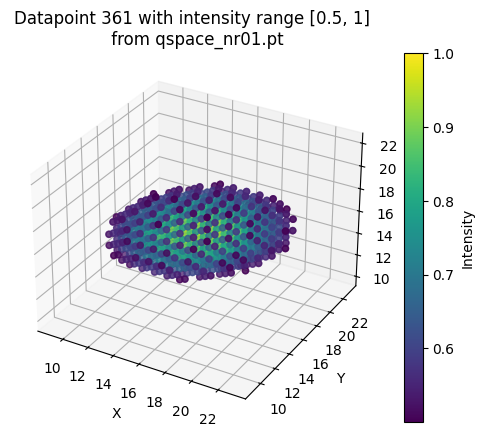

In [7]:
# visualize
title = 'Datapoint ' + str(rnd) + ' with intensity range ' + str(int_range) + ' \n from ' + path[-14:]
visualize(datapoint, int_range=int_range, title=title)

# Noise
Apply basic noise. <br><br>

Add this list later and change the pipeline.

`[0.95, 0.85, 0.75, 0.65, 0.55, 0.45]`

In [8]:
# function to apply different noise to the data
def apply_noise(voxel): 
    # docu
    noise_type = ''
    
    # empty np.array 
    noise = np.zeros(voxel.shape)

    # apply normal distributed noise to the dat
    noise = np.random.normal(0, 0.1, voxel.shape)
    noise_type = 'Normal Distributed Noise'

    # apply Rician Noise
    # noise = np.random.rayleigh(0.1, voxel.shape)
    # noise_type = 'Rician Noise'

    # apply Poisson Noise
    # noise = np.random.poisson(0.1, voxel.shape)

    # apply Salt and Pepper Noise
    # noise = np.random.randint(0, 2, voxel.shape)
    # noise_type = 'Salt and Pepper Noise'



    # apply the gathered noise 
    return voxel + noise, noise_type

In [9]:
noisy_data, noise_type = apply_noise(datapoint)

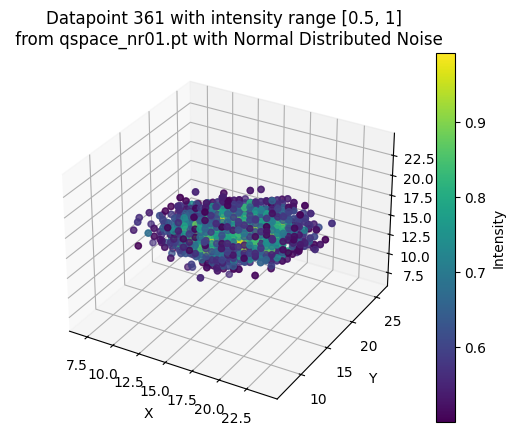

In [10]:
title += ' with ' + noise_type
visualize(noisy_data, int_range=int_range, title=title)

# Noise Visualization

Does no longer work at this point, values do not match.

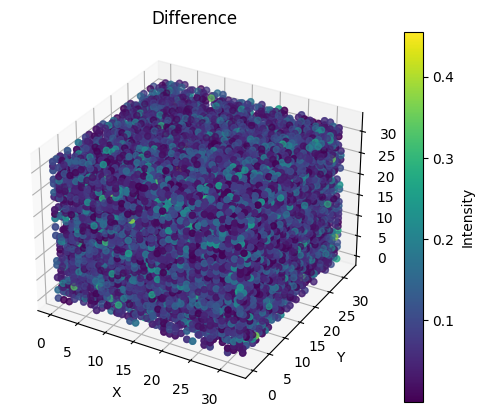

In [11]:
# get difference of both (equals the added noise)
plot_noise(datapoint, noisy_data, int_range=[0,1], title='Difference')

In [12]:
# close everything
plt.close('all')
torch.cuda.empty_cache()